# Red or Black

The Martingale technique is a popular betting strategy used in various games of chance, including roulette. The strategy is based on the idea of doubling your bet after each loss, with the goal of recovering all previous losses and gaining a profit equal to the original bet. Simulations here though show that this technique provides a false sense of success by providing a series of small wins before large losses.  

### Construct the wheel

First, a wheel with two greens, 18 reds and 18 blacks is constructed.

In [1]:
import numpy as np
from random import sample 
import matplotlib.pyplot as plt
import simple_colors 

# sets the parameters
colors = ['red', 'black', 'green']
number = [18, 18, 2]
wheel = []

# adds color strings to the wheel and prints examnples out visually with simple_colors
for i, color in enumerate(colors):
    print()
    print(str(number[i]) + ' ' + color + '...')
    print()
    temp_wheel = [color for x in range(number[i])]
    [print(getattr(simple_colors, color)(color)) for x in temp_wheel][0]
    wheel = wheel + temp_wheel


18 red...

red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red

18 black...

black
black
black
black
black
black
black
black
black
black
black
black
black
black
black
black
black
black

2 green...

green
green


### Run simulations

Simulates the Martingale strategy for a variable number of values a certain number of times and returns summary statistics. 

In [2]:
def martingale(money, attempts=5, record=False):

    """repeats the simulations a certain number of times (attempts) to get a more 
    accurate average for how many spins it takes for a player to bleed dry."""
    averages = []
    for attempt in range(attempts):

        """starts recording cash values and number of reds/blacks on the last attempt
        for plotting below"""
        if attempt == (len(range(attempts))-1):
            record = True
            ledger = []
            reds = []
            blacks = []
            greens = []

        # defines starting variable values for the simulation
        cash = money
        bet = 1
        previous = 'red'
        guess = 'black'
        win = False
        spins = 1
        red = 0
        black = 0
        green = 0

        # a player continues making bets for as long as they have cash
        while cash > 0:
            

            """reduces cash by the bet amount and checks to see if the player has bled dry
            already. If so, they loop is stopped."""
            cash = cash - bet
            if cash < 0:
                break


            """adjusts the guess for the next spin. Sticks with the previous guess if not
            succesfull. Otherwise takes a random guess between red and black."""
            if win == False:
                if previous == 'red':
                    guess = 'black'
                elif previous == 'black':
                    guess = 'red'
                elif previous == 'green':
                    guess = guess
            else:
                guess = sample(['red', 'black'], 1)

            
            # spins the wheel
            result = sample(wheel, 1)[0]
 
            
            # if the guess is successful...
            if guess == result:
                cash = cash+(bet*2)
                bet = 1
                win = True
            # if the guess is not successful...
            else:
                bet=(bet*2)
                win = False

            
            # increments number of the spins
            spins = spins + 1


            """records the data for the cash values and the number of reds, blacks and greens in a row 
            on the last attempt for plotting below when record == True."""
            if record == True:

                # records the current cash value at each play
                ledger.append(cash)

                # records the number of colors in a row
                if result == 'red':
                    red = red + 1
                    reds.append(red)
                    blacks.append(black)
                    greens.append(green)
                    black = 0
                    green = 0
                elif result == 'black':
                    black = black + 1
                    blacks.append(black)
                    reds.append(red)
                    greens.append(green)
                    red = 0
                    green = 0
                elif result == 'green':
                    green = green + 1
                    greens.append(green)
                    blacks.append(black)
                    reds.append(red)
                    black = 0
                    red = 0


            # assigns a new previous
            previous = result

        
        # appends the spins it took for the player to bleed dry
        averages.append(spins)
        

    """returns metrics for the average number of spins it took for a player to bleed dry, the standard 
    error of those averages the cash values, and the number of colors in a row on each spin"""
    avg = int(np.round(sum(averages)/attempts, 1))
    std_error = int(np.round(np.std(averages, ddof=1) / np.sqrt(len(averages))))
    return [avg, std_error, ledger, reds, blacks, greens]
    

""" repeats the test for differen`t cash values from ten to one million dollars
and prints out the number of spins it took to bleed dry and the standard error."""
results = []
amounts = ['$10', '$100', '$1000', '$10,000', '$100,000', '$1,000,000']
for i in range(6):
    cash = 10**(i+1)
    result = martingale(cash)
    print(amounts[i] + '  will last on average --- ' + str(result[0]) + ' spins --- with a standard error of --- ' + str(result[1]))
    print()
    results.append(result)

$10  will last on average --- 14 spins --- with a standard error of --- 3

$100  will last on average --- 154 spins --- with a standard error of --- 35

$1000  will last on average --- 1135 spins --- with a standard error of --- 339

$10,000  will last on average --- 11708 spins --- with a standard error of --- 7505

$100,000  will last on average --- 43318 spins --- with a standard error of --- 14502

$1,000,000  will last on average --- 814439 spins --- with a standard error of --- 331212



### Visualize cash balance

Shows how a players cash balance can go up little by little before leading to large losses that bleed them dry.

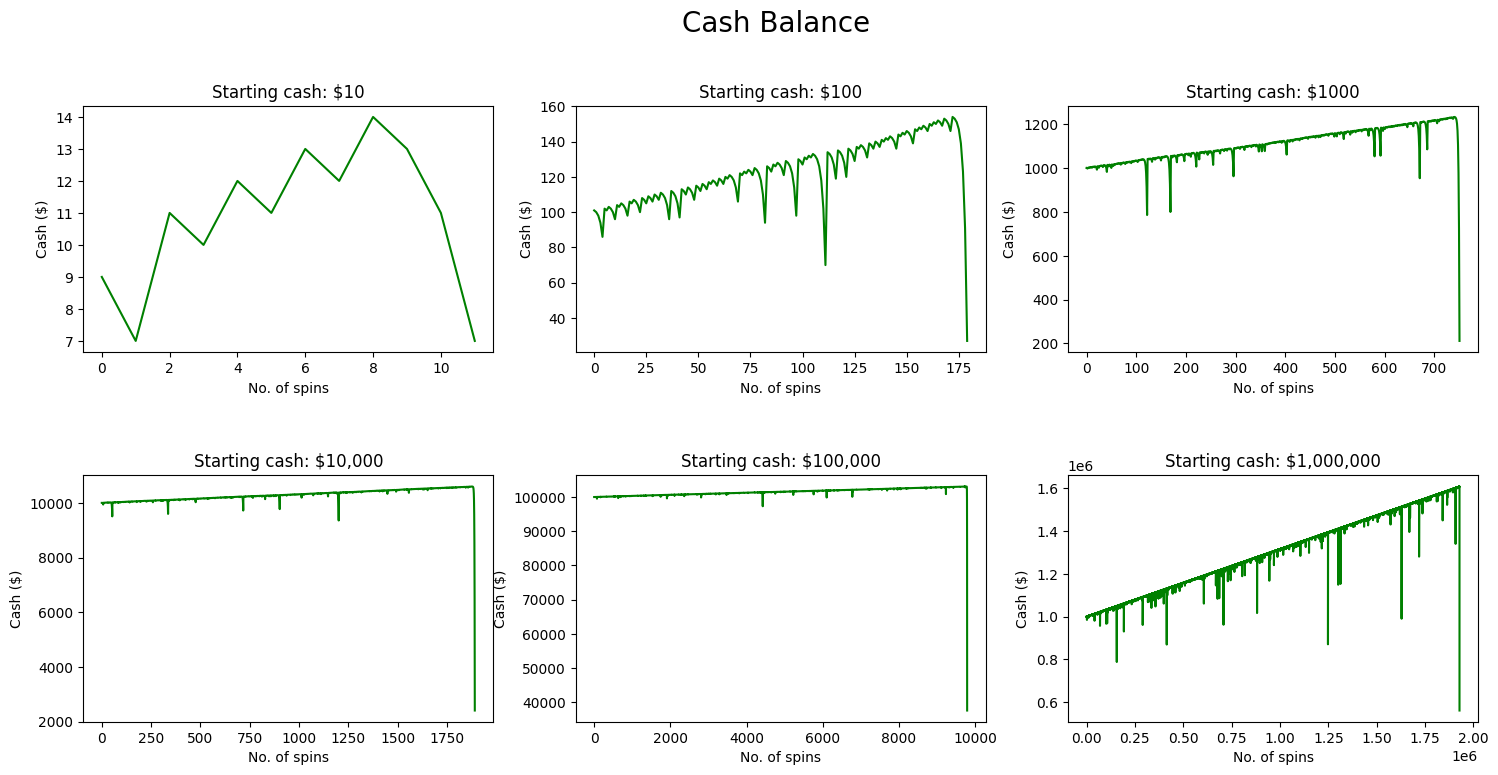

In [3]:
# creates a subplots objects and flattenes it for easy plotting
fig, ax = plt.subplots(2, 3, figsize=(18, 8))

# flatten the ax to a 1D array to plot multiple rows
ax = ax.flatten()

# loops through each amount and plots cash balances
for i, amount in enumerate(amounts):

    y = results[i][2]
    x = range(len(y))
    
    ax[i].plot(x, y, color='green');
    ax[i].set_xlabel('No. of spins');
    ax[i].set_ylabel('Cash ($)');
    ax[i].set_title('Starting cash: ' + str(amount));

# adjust layout for better spacing
plt.subplots_adjust(hspace=0.5, wspace=0.2);

# add overall title
fig.suptitle('Cash Balance', fontsize=20, x=0.51, y=1);

# show the plots
plt.show();

### Visualize colors in a row

Shows how the independence of each spin from the previous one can lead to large runs of one color, potentially devastating a player following the Martingale strategy.

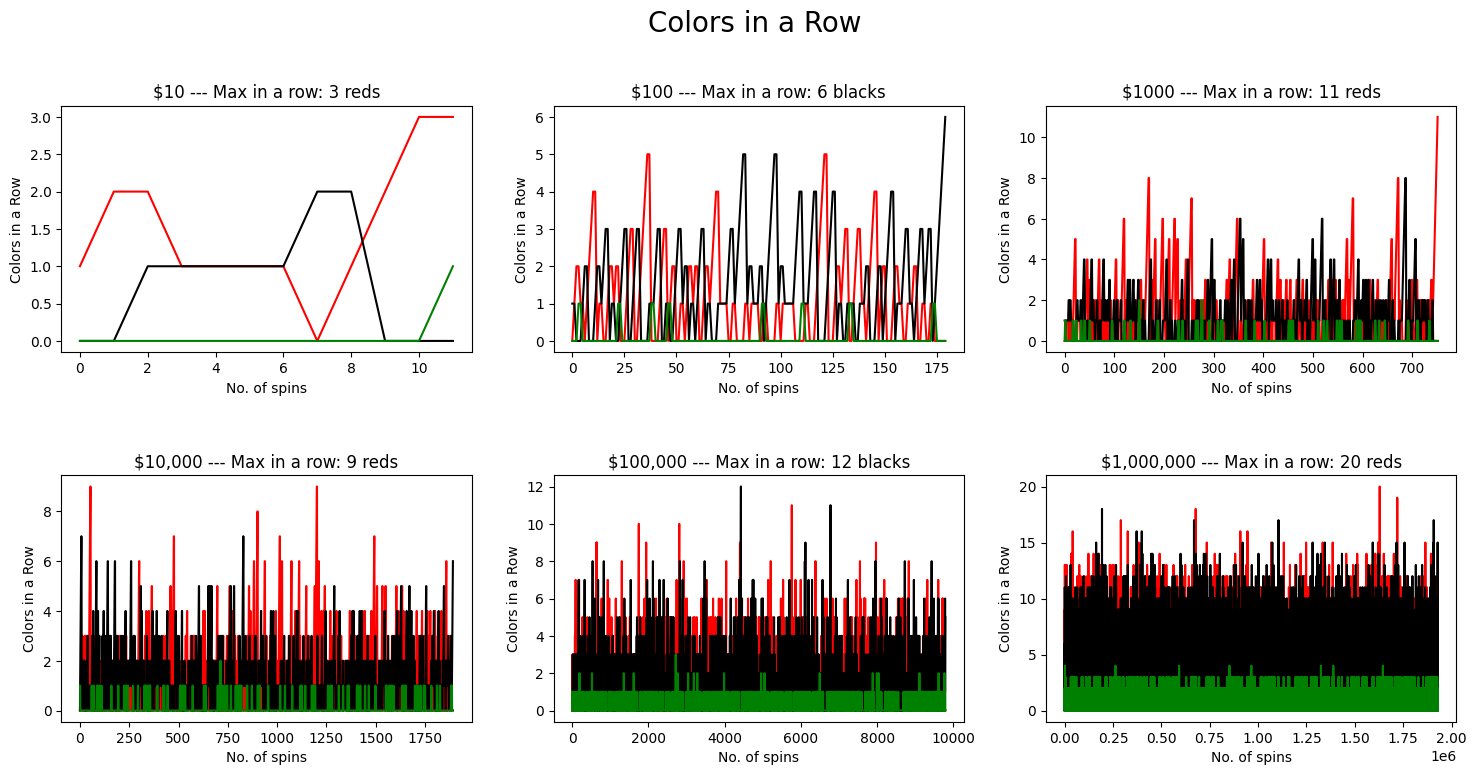

In [4]:
# creates a subplots objects and flattenes it for easy plotting
fig, ax = plt.subplots(2, 3, figsize=(18, 8))

# flatten the ax to a 1D array to plot multiple rows
ax = ax.flatten()

# loops through each amount and plots runs
for i, amount in enumerate(amounts):

    reds = results[i][3]
    blacks = results[i][4]
    greens = results[i][5]
    x = range(len(reds))

    if max(reds) >= max(blacks):
        maximum = 'reds'
        num = max(reds)
    else:
        maximum = 'blacks'
        num = max(blacks)
    
    ax[i].plot(x, reds, color='red');
    ax[i].plot(x, blacks, color='black');
    ax[i].plot(x, greens, color='green');
    ax[i].set_xlabel('No. of spins');
    ax[i].set_ylabel('Colors in a Row');
    ax[i].set_title(str(amount) + ' --- ' + 'Max in a row: ' + str(num) + ' ' + maximum);

# adjust layout for better spacing
plt.subplots_adjust(hspace=0.5, wspace=0.2);

# add overall title
fig.suptitle('Colors in a Row', fontsize=20, x=0.51, y=1);

# show the plots
plt.show();